In [1]:

!pip install -r requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load raw hourly dataset 
  
df_raw = pd.read_csv("hour.csv")

# create datetime timestamp and sort
df_raw["dteday"] = pd.to_datetime(df_raw["dteday"])
df_raw["timestamp"] = df_raw["dteday"] + pd.to_timedelta(df_raw["hr"], unit="h")
df_raw = df_raw.sort_values("timestamp").reset_index(drop=True)


print("Raw shape:", df_raw.shape)
print("Time range:", df_raw["timestamp"].min(), "to", df_raw["timestamp"].max())


Raw shape: (17379, 18)
Time range: 2011-01-01 00:00:00 to 2012-12-31 23:00:00


In [2]:
#  dataset overview (dimensions, columns, dtypes, sampling, missingness)
print("Columns and dtypes:\n", df_raw.dtypes, "\n")
print("Number of rows:", len(df_raw))
print("Unique timestamps:", df_raw["timestamp"].nunique())

# Sampling rate check
hours_per_day = df_raw.groupby("dteday")["hr"].nunique()
print("\nSampling rate (unique hours per day) summary:")
print(hours_per_day.describe())

# Missingness per column 
print("\nMissing values per column:\n", df_raw.isnull().sum())

# show numeric columns and their overview
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", numeric_cols)
display(df_raw[numeric_cols].describe().T)


Columns and dtypes:
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
timestamp     datetime64[ns]
dtype: object 

Number of rows: 17379
Unique timestamps: 17379

Sampling rate (unique hours per day) summary:
count    731.000000
mean      23.774282
std        1.350675
min        1.000000
25%       24.000000
50%       24.000000
75%       24.000000
max       24.000000
Name: hr, dtype: float64

Missing values per column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
worki

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Duplicate rows (entire row duplicated): 0
Duplicate timestamps: 0

Large Cnt detection (IQR method):
Lower bound: -321.5
Upper bound: 642.5
Number of Large Cnt hours: 505


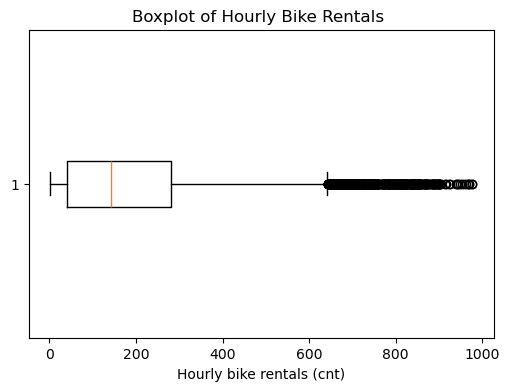

In [3]:
# Duplicate and outlier checks 

# Duplicate rows
print("Duplicate rows (entire row duplicated):", df_raw.duplicated().sum())

# Duplicate timestamps 
print("Duplicate timestamps:", df_raw["timestamp"].duplicated().sum())


#  Large cnt detection using IQR 
Q1 = df_raw["cnt"].quantile(0.25)
Q3 = df_raw["cnt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_cnt = df_raw[(df_raw["cnt"] < lower_bound) | (df_raw["cnt"] > upper_bound)]

print("\nLarge Cnt detection (IQR method):")
print("Lower bound:", round(lower_bound, 2))
print("Upper bound:", round(upper_bound, 2))
print("Number of Large Cnt hours:", len(outliers_cnt))


# --- 3. Visual confirmation (boxplot) ---
plt.figure(figsize=(6,4))
plt.boxplot(df_raw["cnt"], vert=False)
plt.xlabel("Hourly bike rentals (cnt)")
plt.title("Boxplot of Hourly Bike Rentals ")
plt.show()


In [4]:
#  detect missing hourly timestamps 
full_index = pd.date_range(start=df_raw["timestamp"].min(), end=df_raw["timestamp"].max(), freq="H")
missing_ts = full_index.difference(df_raw["timestamp"])
print("Full hourly index length (expected rows):", len(full_index))
print("Recorded rows:", len(df_raw))
print("Number of missing hourly timestamps:", len(missing_ts))
print("First 10 missing timestamps (if any):")
print(missing_ts[:10])


Full hourly index length (expected rows): 17544
Recorded rows: 17379
Number of missing hourly timestamps: 165
First 10 missing timestamps (if any):
DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00'],
              dtype='datetime64[ns]', freq=None)


C:\Users\Vikram\AppData\Local\Temp\ipykernel_25296\2954323665.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df_raw["timestamp"].min(), end=df_raw["timestamp"].max(), freq="H")


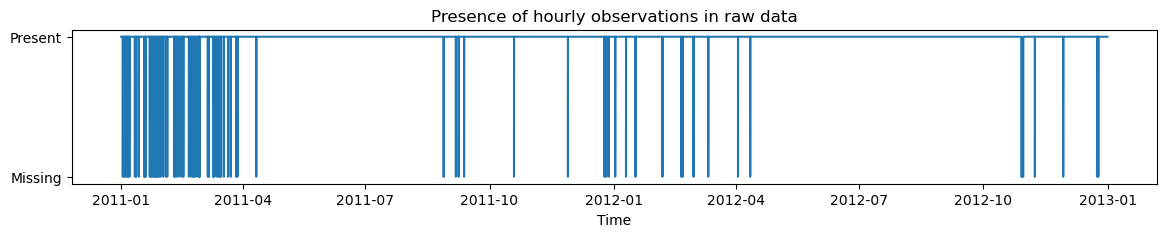

In [5]:
#  presence timeline and zoom into first missing timestamp
is_present = full_index.isin(df_raw["timestamp"]).astype(int)

plt.figure(figsize=(14,2))
plt.step(full_index, is_present, where="post")
plt.yticks([0,1], ["Missing","Present"])
plt.title("Presence of hourly observations in raw data")
plt.xlabel("Time")
plt.show()




In [6]:
# Cell 5: basic descriptives and quantiles for the raw dataset
print("Descriptives for target & weather (raw):")
display(df_raw[["cnt","temp","atemp","hum","windspeed","casual","registered"]].describe().T)

print("\nSelected quantiles for 'cnt' (raw):")
print(df_raw["cnt"].quantile([0.10,0.25,0.50,0.75,0.90]).to_string())


Descriptives for target & weather (raw):


,count,mean,std,min,25%,50%,75%,max
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000



Selected quantiles for 'cnt' (raw):
0.10      9.0
0.25     40.0
0.50    142.0
0.75    281.0
0.90    451.2


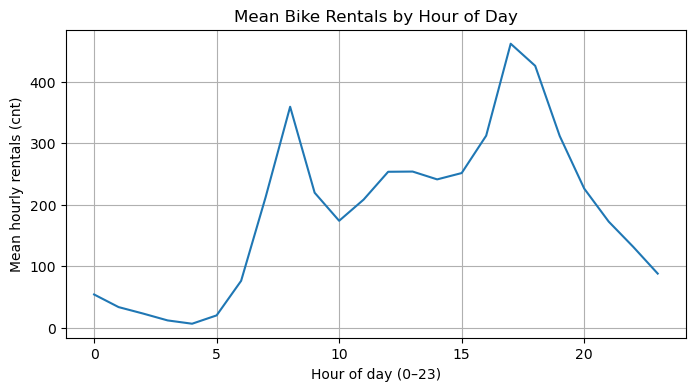

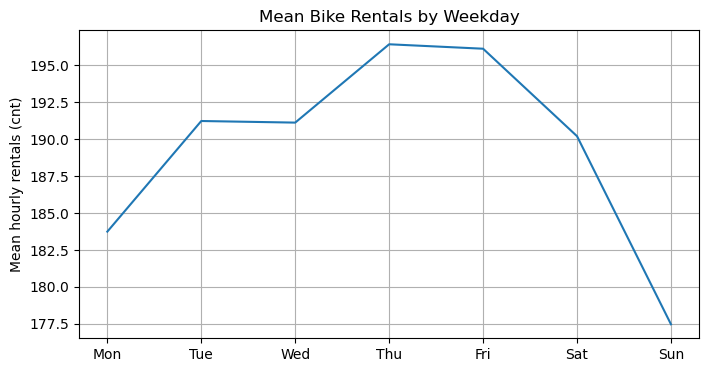

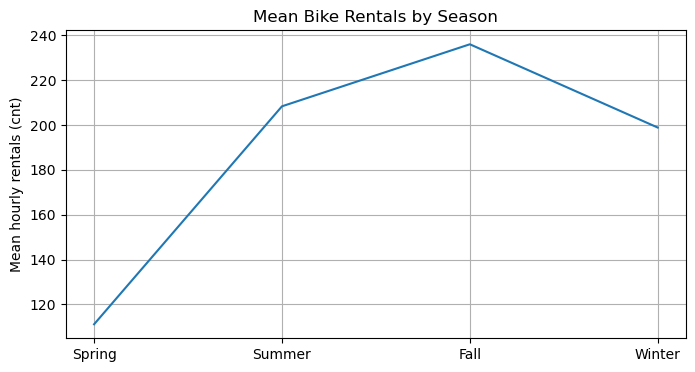

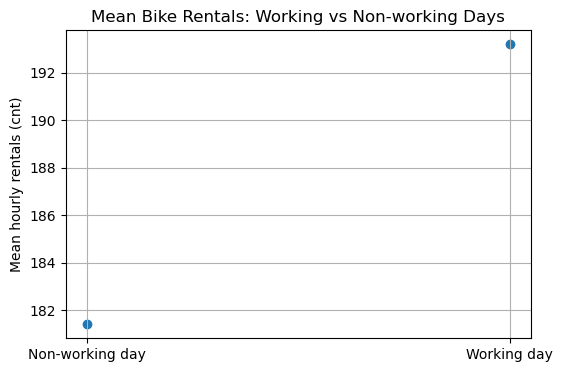

In [7]:
# Grouped statistics visualized as scatter plots 

import matplotlib.pyplot as plt
import numpy as np

# 1. Mean cnt by hour of day
hour_mean = df_raw.groupby(df_raw["timestamp"].dt.hour)["cnt"].mean()

plt.figure(figsize=(8,4))
plt.plot(hour_mean.index, hour_mean.values)
plt.xlabel("Hour of day (0–23)")
plt.ylabel("Mean hourly rentals (cnt)")
plt.title("Mean Bike Rentals by Hour of Day")
plt.grid(True)
plt.show()


#2. Mean cnt by weekday
weekday_mean = df_raw.groupby(df_raw["timestamp"].dt.weekday)["cnt"].mean()

weekday_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
x_weekday = np.arange(len(weekday_mean))

plt.figure(figsize=(8,4))
plt.plot(x_weekday, weekday_mean.values)
plt.xticks(x_weekday, weekday_labels)
plt.ylabel("Mean hourly rentals (cnt)")
plt.title("Mean Bike Rentals by Weekday")
plt.grid(True)
plt.show()


#3. Mean cnt by season
season_mean = df_raw.groupby("season")["cnt"].mean()

season_labels = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}
x_season = np.arange(len(season_mean))

plt.figure(figsize=(8,4))
plt.plot(x_season, season_mean.values)
plt.xticks(x_season, [season_labels[s] for s in season_mean.index])
plt.ylabel("Mean hourly rentals (cnt)")
plt.title("Mean Bike Rentals by Season")
plt.grid(True)
plt.show()


#4. Mean cnt by working day
workingday_mean = df_raw.groupby("workingday")["cnt"].mean()

x_work = np.arange(len(workingday_mean))
labels_work = ["Non-working day", "Working day"]

plt.figure(figsize=(6,4))
plt.scatter(x_work, workingday_mean.values)
plt.xticks(x_work, labels_work)
plt.ylabel("Mean hourly rentals (cnt)")
plt.title("Mean Bike Rentals: Working vs Non-working Days")
plt.grid(True)
plt.show()


In [8]:
#  create df by reindexing to full hourly index and mark which rows were missing before interpolation
df = df_raw.set_index("timestamp").sort_index().copy()

# reindex to full index (hours are explicit NaNs)
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="H")
df = df.reindex(full_index)

# mask for missing rows
mask_missing_before = df["cnt"].isnull().copy()

print("After reindex: total rows:", len(df))
print("Missing rows after reindex (cnt):", mask_missing_before.sum())


After reindex: total rows: 17544
Missing rows after reindex (cnt): 165


C:\Users\Vikram\AppData\Local\Temp\ipykernel_25296\579812893.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="H")


In [9]:
# interpolate cnt, casual, registered (time method), and verify original values unchanged
for col in ["cnt","casual","registered"]:
    df[col] = df[col].interpolate(method="time")

# verify missing are filled for these cols
print("Missing after interpolation (cnt, casual, registered):")
print(df[["cnt","casual","registered"]].isnull().sum())

# verify original observed values are unchanged
raw_index = df_raw.set_index("timestamp").index
common_index = raw_index.intersection(df.index)
diff = (df.loc[common_index,"cnt"] - df_raw.set_index("timestamp").loc[common_index,"cnt"]).abs()
print("\nMax absolute difference between preprocessed and raw where raw existed:", diff.max())


Missing after interpolation (cnt, casual, registered):
cnt           0
casual        0
registered    0
dtype: int64

Max absolute difference between preprocessed and raw where raw existed: 0.0


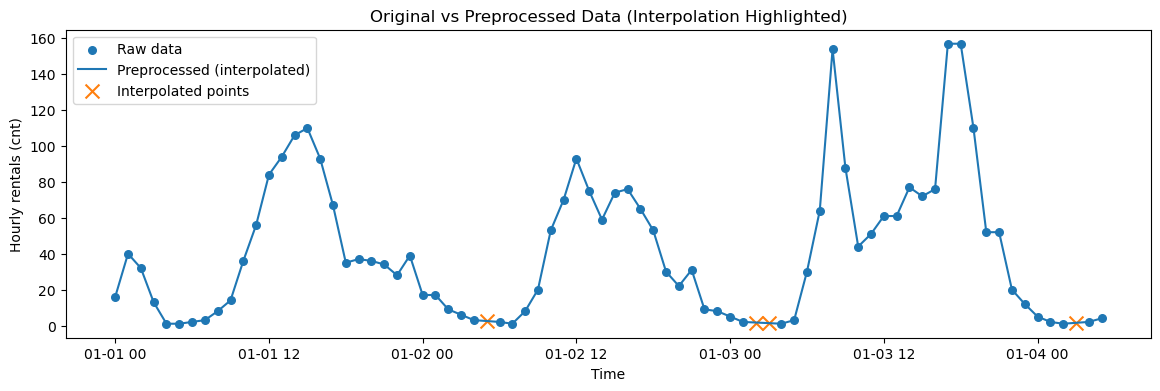

In [10]:
# Simple before/after comparison around a missing hour

# 1. Pick the first missing timestamp
missing_times = mask_missing_before[mask_missing_before].index

if len(missing_times) == 0:
    print("No missing timestamps to visualize.")
else:
    missing_time = missing_times[0]

    # 2. Define a clear time window (±2 days)
    window_start = missing_time - pd.Timedelta(days=2)
    window_end = missing_time + pd.Timedelta(days=2)

    # 3. Slice raw and preprocessed data
    raw_window = df_raw.set_index("timestamp").loc[window_start:window_end]
    pre_window = df.loc[window_start:window_end]

    # 4. Plot
    plt.figure(figsize=(14,4))

    # Raw data (points)
    plt.scatter(
        raw_window.index,
        raw_window["cnt"],
        label="Raw data",
        s=30
    )

    # Preprocessed data (line)
    plt.plot(
        pre_window.index,
        pre_window["cnt"],
        label="Preprocessed (interpolated)",
        linewidth=1.5
    )

    # Highlight interpolated points
    interpolated_points = pre_window[mask_missing_before.loc[window_start:window_end]]

    plt.scatter(
        interpolated_points.index,
        interpolated_points["cnt"],
        marker="x",
        s=100,
        label="Interpolated points"
    )

    plt.xlabel("Time")
    plt.ylabel("Hourly rentals (cnt)")
    plt.title("Original vs Preprocessed Data (Interpolation Highlighted)")
    plt.legend()
    plt.show()


In [11]:
#  basic feature engineering
# 1) weekend flag
df["is_weekend"] = (df.index.weekday >= 5).astype(int)

# 2) rush hours (top 25% average hours)
hourly_mean = df.groupby(df.index.hour)["cnt"].mean()
threshold = hourly_mean.quantile(0.75)
rush_hours = hourly_mean[hourly_mean >= threshold].index.tolist()
df["is_rush_hour"] = df.index.hour.isin(rush_hours).astype(int)
print("Derived rush hours (data-driven):", rush_hours)

# 3) 1-hour lag 
df["cnt_lag_1"] = df["cnt"].shift(1)


print("New features: is_weekend, is_rush_hour, cnt_lag_1 added. Current shape:", df.shape)


Derived rush hours (data-driven): [8, 13, 16, 17, 18, 19]
New features: is_weekend, is_rush_hour, cnt_lag_1 added. Current shape: (17544, 20)


In [12]:
# Cell 11: basic stats on preprocessed data 
print("Descriptive stats (preprocessed):")
display(df[["cnt","temp","hum","windspeed","casual","registered"]].describe().T)

print("\nQuantiles for cnt (preprocessed):")
print(df["cnt"].quantile([0.10,0.25,0.5,0.75,0.90]).to_string())

print("\nMean rentals by hour (preprocessed):")
print(df.groupby(df.index.hour)["cnt"].mean().round(2).to_string())

print("\nMean rentals by weekday (preprocessed):")
print(df.groupby(df.index.weekday)["cnt"].mean().round(2).to_string())


Descriptive stats (preprocessed):


,count,mean,std,min,25%,50%,75%,max
cnt,17544.0,187.886485,181.278201,1.00,38.0000,140.000,279.0000,977.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.500,0.6600,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.630,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.194,0.2537,0.8507
casual,17544.0,35.358556,49.181593,0.00,4.0000,16.000,48.0000,367.0000
registered,17544.0,152.527930,151.218524,0.00,33.0000,114.000,219.0000,886.0000



Quantiles for cnt (preprocessed):
0.10      8.0
0.25     38.0
0.50    140.0
0.75    279.0
0.90    449.0

Mean rentals by hour (preprocessed):
0      53.70
1      33.27
2      22.75
3      11.53
4       6.47
5      19.77
6      75.65
7     211.14
8     357.28
9     218.35
10    172.97
11    207.26
12    252.54
13    253.08
14    240.40
15    250.66
16    311.64
17    460.91
18    423.91
19    310.40
20    225.25
21    171.76
22    130.95
23     87.63

Mean rentals by weekday (preprocessed):
0    181.26
1    188.50
2    189.62
3    194.64
4    195.44
5    189.64
6    176.26


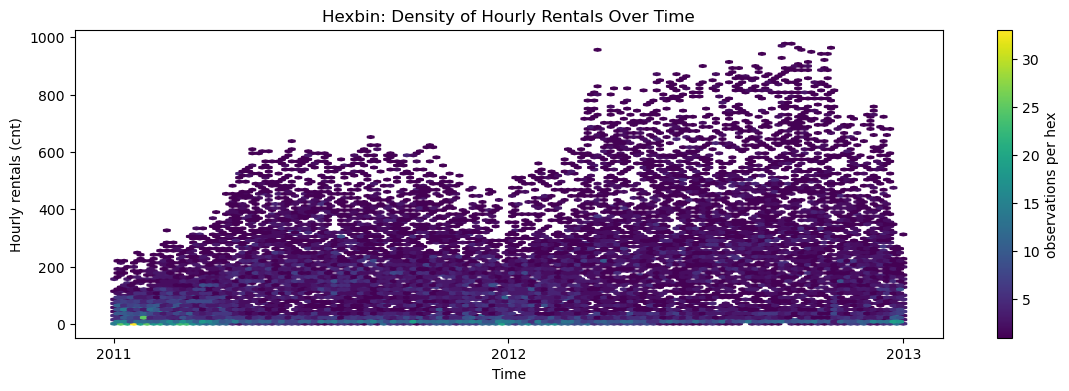

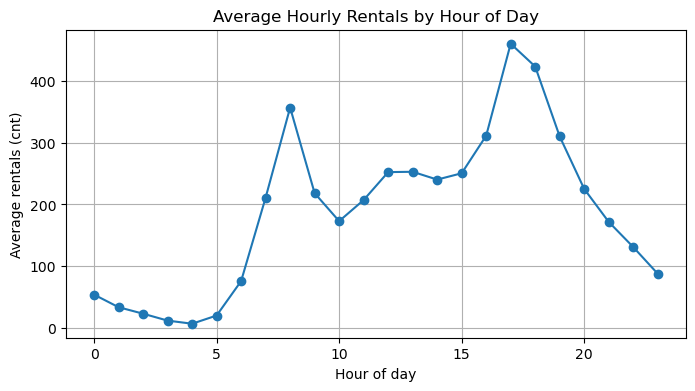

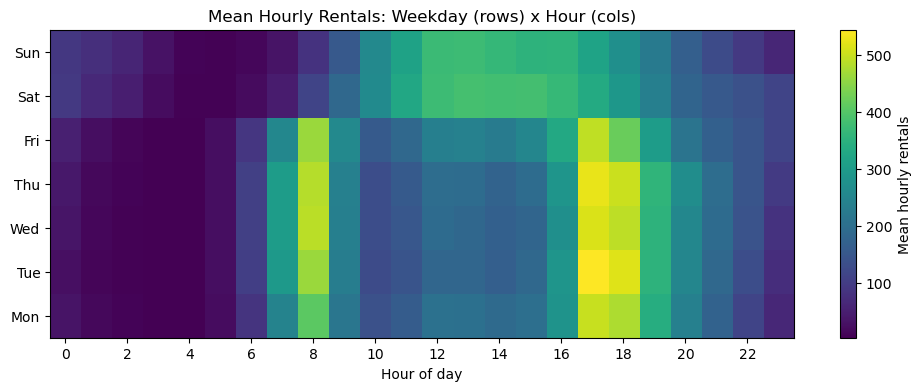

In [13]:
# hexbin density (time vs cnt) - shows where rentals are concentrated over time
time_numeric = mdates.date2num(df.index.to_pydatetime())
plt.figure(figsize=(14,4))
hb = plt.hexbin(time_numeric, df["cnt"], gridsize=120, mincnt=1)
plt.colorbar(hb, label="observations per hex")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.title("Hexbin: Density of Hourly Rentals Over Time")
plt.xlabel("Time")
plt.ylabel("Hourly rentals (cnt)")
plt.show()

# Average hourly profile (0-23)
hourly_mean = df.groupby(df.index.hour)["cnt"].mean()
plt.figure(figsize=(8,4))
plt.plot(hourly_mean.index, hourly_mean.values, marker="o")
plt.title("Average Hourly Rentals by Hour of Day")
plt.xlabel("Hour of day")
plt.ylabel("Average rentals (cnt)")
plt.grid(True)
plt.show()

#  Hour x weekday heatmap (mean cnt) — rows: weekday (Mon..Sun), cols: hour (0..23)
pivot = df.groupby([df.index.weekday, df.index.hour])["cnt"].mean().unstack(level=1)
plt.figure(figsize=(12,4))
plt.imshow(pivot, aspect='auto', origin='lower')
plt.colorbar(label='Mean hourly rentals')
plt.yticks(range(7), ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xticks(range(0,24,2))
plt.title("Mean Hourly Rentals: Weekday (rows) x Hour (cols)")
plt.xlabel("Hour of day")
plt.show()


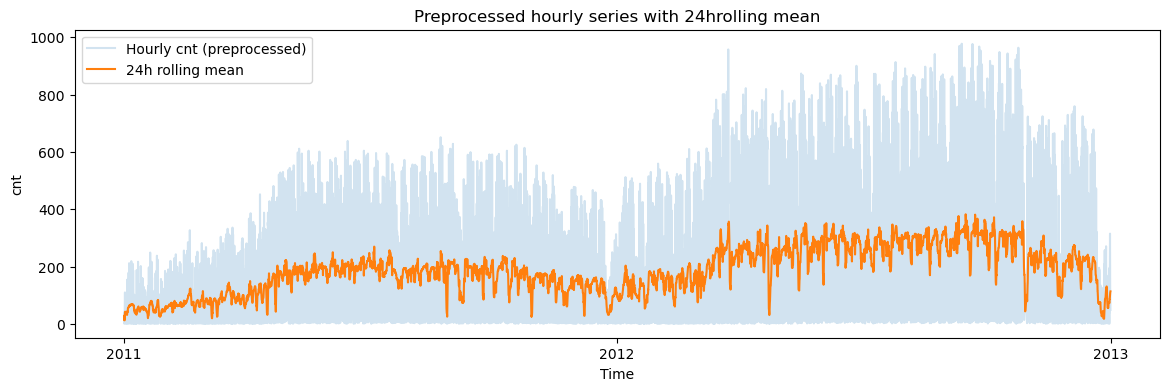

In [14]:
#  Time-series visualizations


# Preprocessed full series with rolling means
plt.figure(figsize=(14,4))
plt.plot(df.index, df["cnt"], alpha=0.2, label="Hourly cnt (preprocessed)")
plt.plot(df.index, df["cnt"].rolling(24, min_periods=1).mean(), linewidth=1.5, label="24h rolling mean")
plt.title("Preprocessed hourly series with 24hrolling mean")
plt.xlabel("Time"); plt.ylabel("cnt")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.show()




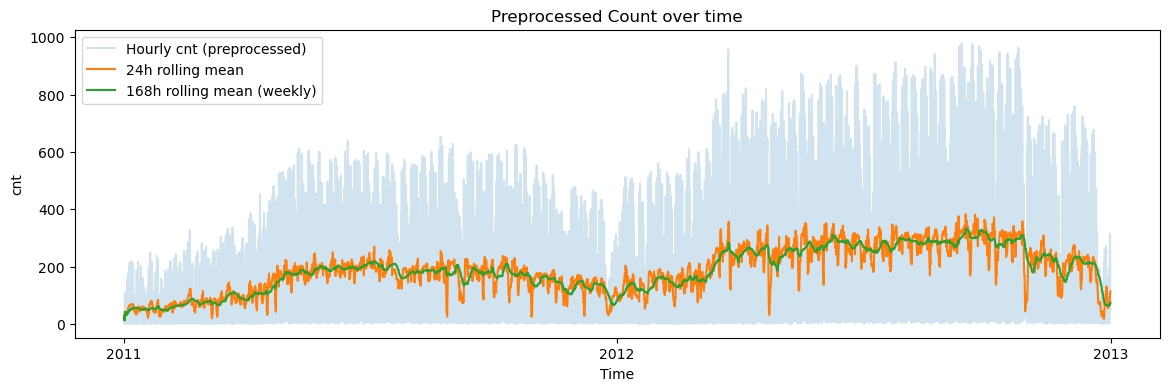

In [15]:
#  Time-series visualizations


# Preprocessed full series with rolling means
plt.figure(figsize=(14,4))
plt.plot(df.index, df["cnt"], alpha=0.2, label="Hourly cnt (preprocessed)")
plt.plot(df.index, df["cnt"].rolling(24, min_periods=1).mean(), linewidth=1.5, label="24h rolling mean")
plt.plot(df.index, df["cnt"].rolling(168, min_periods=1).mean(), linewidth=1.5, label="168h rolling mean (weekly)")
plt.title("Preprocessed Count over time")
plt.xlabel("Time"); plt.ylabel("cnt")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.show()




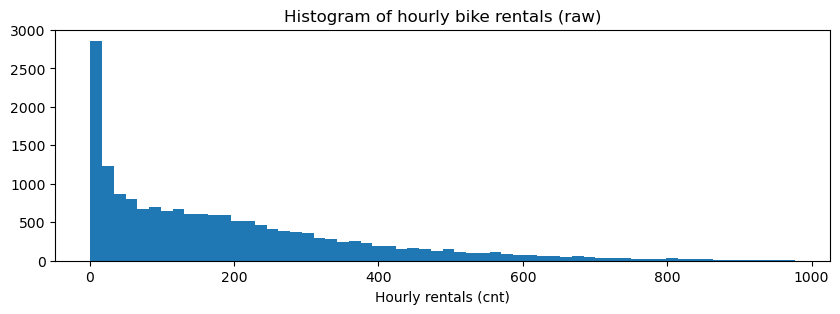

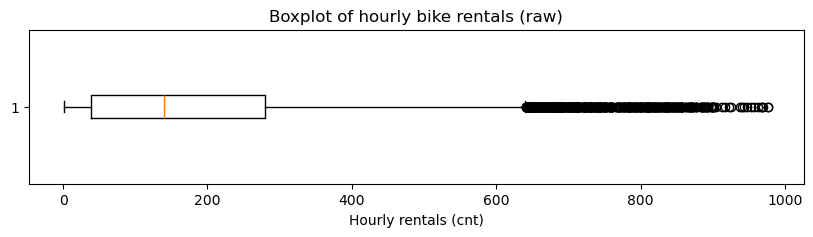

In [16]:
 #Histogram and boxplot for 'cnt'
plt.figure(figsize=(10,3))
plt.hist(df["cnt"], bins=60)
plt.xlabel("Hourly rentals (cnt)")
plt.title("Histogram of hourly bike rentals (raw)")
plt.show()

plt.figure(figsize=(10,2))
plt.boxplot(df["cnt"].dropna(), vert=False)
plt.xlabel("Hourly rentals (cnt)")
plt.title("Boxplot of hourly bike rentals (raw)")
plt.show()


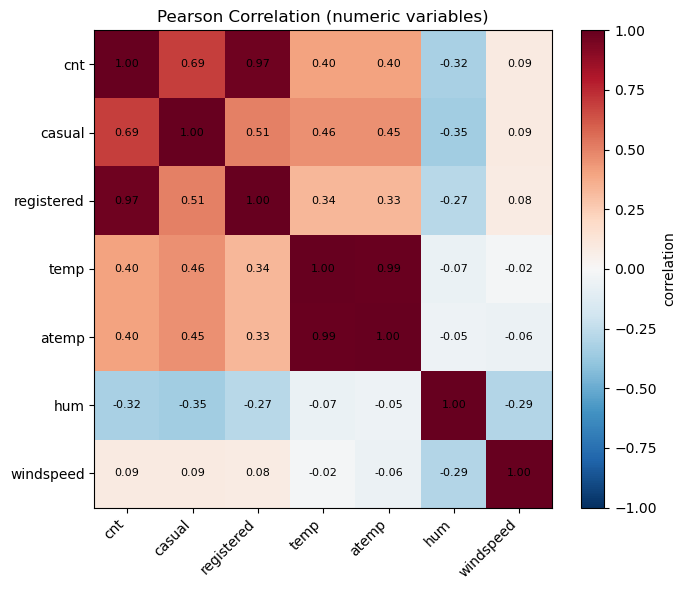

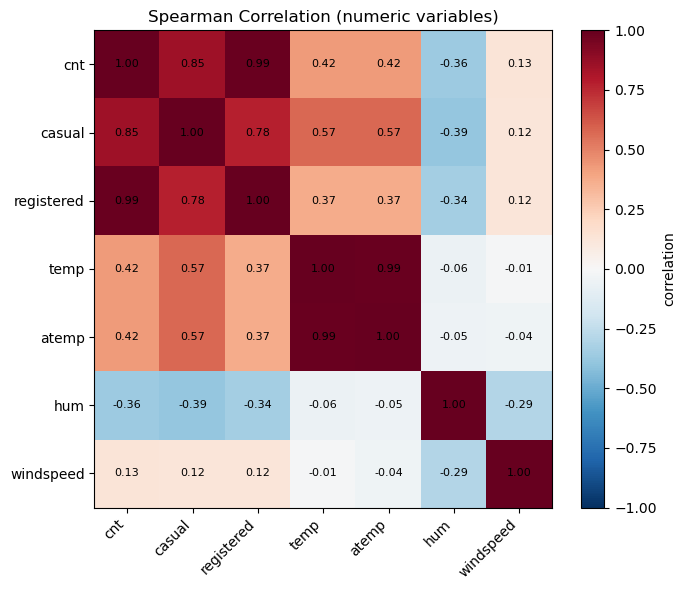

Top correlations with 'cnt' (Pearson):
cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hum           0.322911
windspeed     0.093234
Name: cnt, dtype: float64

Top correlations with 'cnt' (Spearman):
cnt           1.000000
registered    0.989444
casual        0.850525
temp          0.423330
atemp         0.423258
hum           0.359614
windspeed     0.126629
Name: cnt, dtype: float64


In [17]:
# Correlation analysis (Pearson and Spearman) and heatmaps
import numpy as np

num_cols = ["cnt","casual","registered","temp","atemp","hum","windspeed"]
data = df[num_cols].dropna()

pearson = data.corr(method='pearson')
spearman = data.corr(method='spearman')

def plot_corr_matrix(mat, title):
    plt.figure(figsize=(7,6))
    plt.imshow(mat, vmin=-1, vmax=1, cmap='RdBu_r', aspect='auto')
    plt.colorbar(label='correlation')
    ticks = np.arange(len(mat.columns))
    plt.xticks(ticks, mat.columns, rotation=45, ha='right')
    plt.yticks(ticks, mat.columns)
    # annotate
    for i in range(len(mat.columns)):
        for j in range(len(mat.columns)):
            plt.text(j, i, f"{mat.iloc[i,j]:.2f}", ha='center', va='center', color='black', fontsize=8)
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_corr_matrix(pearson, "Pearson Correlation (numeric variables)")
plot_corr_matrix(spearman, "Spearman Correlation (numeric variables)")

# Print strongest correlations with cnt
print("Top correlations with 'cnt' (Pearson):")
print(pearson["cnt"].abs().sort_values(ascending=False).head(10))
print("\nTop correlations with 'cnt' (Spearman):")
print(spearman["cnt"].abs().sort_values(ascending=False).head(10))


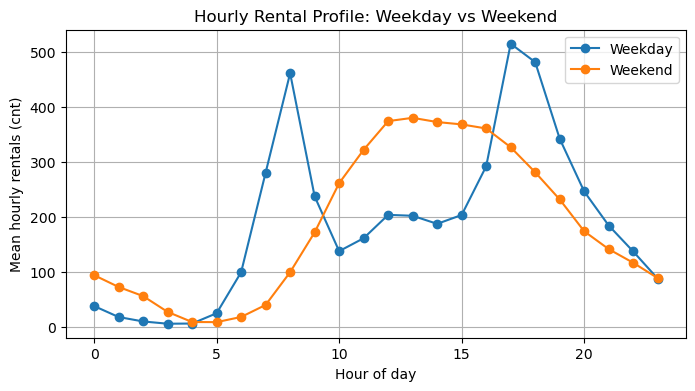

In [18]:
# Weekday vs weekend hourly profiles 

# Separate weekday and weekend data first
weekday_df = df[df["is_weekend"] == 0]
weekend_df = df[df["is_weekend"] == 1]

# Compute mean rentals by hour of day
weekday_profile = weekday_df.groupby(weekday_df.index.hour)["cnt"].mean()
weekend_profile = weekend_df.groupby(weekend_df.index.hour)["cnt"].mean()

# Plot
plt.figure(figsize=(8,4))
plt.plot(weekday_profile.index, weekday_profile.values, marker='o', label="Weekday")
plt.plot(weekend_profile.index, weekend_profile.values, marker='o', label="Weekend")
plt.xlabel("Hour of day")
plt.ylabel("Mean hourly rentals (cnt)")
plt.title("Hourly Rental Profile: Weekday vs Weekend")
plt.legend()
plt.grid(True)
plt.show()


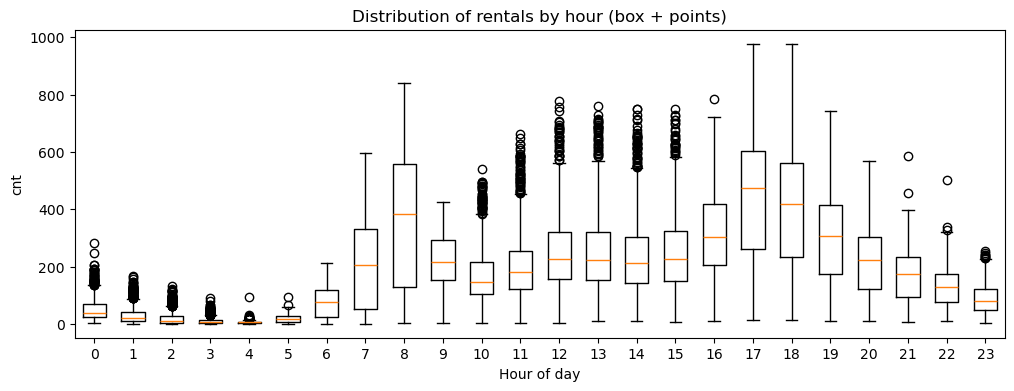

In [19]:
# Distribution across hour-of-day 
import numpy as np

plt.figure(figsize=(12,4))
# Prepare data: list of arrays per hour
groups = [df[df.index.hour==h]["cnt"].dropna() for h in range(24)]
plt.boxplot(groups, positions=range(24), widths=0.6)

 
plt.xlabel("Hour of day"); plt.ylabel("cnt"); plt.title("Distribution of rentals by hour (box + points)")
plt.show()









In [20]:
#  Summary checks with evidence

checks = {}

#Hourly peaks
hourly_mean = df.groupby(df.index.hour)["cnt"].mean()
global_mean = hourly_mean.mean()

morning_hours = [7, 8, 9]
evening_hours = [16, 17, 18]

checks["morning_peak"] = hourly_mean.loc[morning_hours].mean() > global_mean
checks["evening_peak"] = hourly_mean.loc[evening_hours].mean() > global_mean

#Weekday vs Weekend
weekday_mean_val = df[df["is_weekend"] == 0]["cnt"].mean()
weekend_mean_val = df[df["is_weekend"] == 1]["cnt"].mean()
checks["weekday_gt_weekend"] = weekday_mean_val > weekend_mean_val

#Temperature correlation
pearson_temp = df[["cnt", "temp"]].dropna().corr().loc["cnt", "temp"]
checks["temp_positive_corr"] = pearson_temp > 0.2

#User composition
checks["registered_gt_casual"] = df["registered"].mean() > df["casual"].mean()

#Missing timestamps
full_index = pd.date_range(df_raw["timestamp"].min(), df_raw["timestamp"].max(), freq="H")
missing_hours = len(full_index.difference(df_raw["timestamp"]))
checks["missing_gt_100"] = missing_hours > 100

#Print results with evidence
print("Summary checks (True = supported by data):\n")

print(f"Morning peak present (7–9)? {checks['morning_peak']} | "
      f"Mean={hourly_mean.loc[morning_hours].mean():.1f}, Global mean={global_mean:.1f}")

print(f"Evening peak present (16–18)? {checks['evening_peak']} | "
      f"Mean={hourly_mean.loc[evening_hours].mean():.1f}")

print(f"\nWeekday mean > Weekend mean? {checks['weekday_gt_weekend']} | "
      f"Weekday={weekday_mean_val:.1f}, Weekend={weekend_mean_val:.1f}")

print(f"\nTemperature positively correlated with rentals? {checks['temp_positive_corr']} | "
      f"Pearson r={pearson_temp:.2f}")

print(f"\nRegistered users dominate demand? {checks['registered_gt_casual']} | "
      f"Registered mean={df['registered'].mean():.1f}, Casual mean={df['casual'].mean():.1f}")




Summary checks (True = supported by data):

Morning peak present (7–9)? True | Mean=262.3, Global mean=187.9
Evening peak present (16–18)? True | Mean=398.8

Weekday mean > Weekend mean? True | Weekday=189.9, Weekend=182.9

Temperature positively correlated with rentals? True | Pearson r=0.40

Registered users dominate demand? True | Registered mean=152.5, Casual mean=35.4


C:\Users\Vikram\AppData\Local\Temp\ipykernel_25296\2950277870.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(df_raw["timestamp"].min(), df_raw["timestamp"].max(), freq="H")


Event definition:
  Hour occurs in summer AND cnt > overall (year-wide) median

Overall median cnt = 140.0
Number of summer hours = 4409
Number of summer hours above overall median = 2435

Empirical probability:
P(cnt > overall median | summer) = 0.5523 (55.23%)


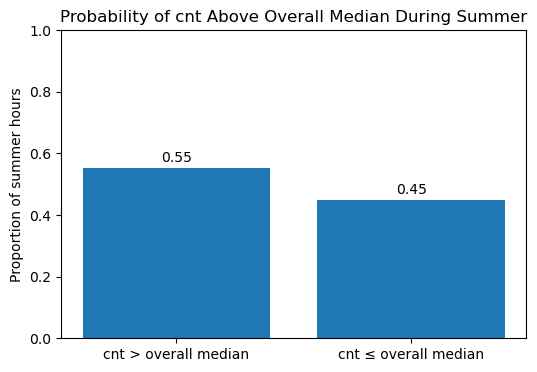

In [21]:
# Event probability: cnt above OVERALL median during summer

import matplotlib.pyplot as plt

# Define summer
df["is_summer"] = df["season"] == 2

# Compute overall median
overall_median = df["cnt"].median()

# Define event: summer hour with cnt above overall median
df["cnt_above_overall_median_in_summer"] = (
    df["is_summer"] & (df["cnt"] > overall_median)
)

#  probability of Summer hours having a larger count that the overall median
num_summer_hours = df["is_summer"].sum()
num_event_hours = df["cnt_above_overall_median_in_summer"].sum()

prob_event = num_event_hours / num_summer_hours

print("Event definition:")
print("  Hour occurs in summer AND cnt > overall (year-wide) median\n")

print(f"Overall median cnt = {overall_median:.1f}")
print(f"Number of summer hours = {num_summer_hours}")
print(f"Number of summer hours above overall median = {num_event_hours}")
print(f"\nEmpirical probability:")
print(f"P(cnt > overall median | summer) = {prob_event:.4f} ({prob_event*100:.2f}%)")

# Visual evidence 

counts = [
    num_event_hours,                     # above median
    num_summer_hours - num_event_hours   # below or equal median
]

labels = ["cnt > overall median", "cnt ≤ overall median"]
proportions = np.array(counts) / num_summer_hours

plt.figure(figsize=(6,4))
plt.bar(labels, proportions)
plt.ylabel("Proportion of summer hours")
plt.ylim(0,1)
plt.title("Probability of cnt Above Overall Median During Summer")

for i, p in enumerate(proportions):
    plt.text(i, p + 0.02, f"{p:.2f}", ha="center")

plt.show()


In [22]:
# cross-tabs

import pandas as pd



# Median threshold
cnt_median = df["cnt"].median()

# Binary demand indicator
df["cnt_above_median"] = df["cnt"] > cnt_median

# Summer indicator
df["is_summer"] = df["season"] == 2

# Weekday indicator
df["is_weekday"] = df.index.weekday < 5



print(f"cnt median threshold = {cnt_median:.1f}\n")


#  Summer × cnt_above_median


ct_summer = pd.crosstab(
    df["is_summer"],
    df["cnt_above_median"],
    normalize="index"
)

print("Cross-tab: Summer × (cnt > median)")
print(ct_summer.round(3), "\n")


# Weekday × cnt_above_median


ct_weekday = pd.crosstab(
    df["is_weekday"],
    df["cnt_above_median"],
    normalize="index"
)

print("Cross-tab: Weekday × (cnt > median)")
print(ct_weekday.round(3), "\n")







cnt median threshold = 140.0

Cross-tab: Summer × (cnt > median)
cnt_above_median  False  True 
is_summer                     
False             0.519  0.481
True              0.448  0.552 

Cross-tab: Weekday × (cnt > median)
cnt_above_median  False  True 
is_weekday                    
False             0.538  0.462
True              0.486  0.514 



In [23]:
# Probability definitions using events A and B 


# Define events

# Event A: cnt above overall median
A = df["cnt_above_median"]

# Event B: hour occurs during summer
B = df["is_summer"]


# Marginal probabilities

P_A = A.mean()
P_B = B.mean()


# Conditional probabilities

P_A_given_B = df.loc[B, "cnt_above_median"].mean()
P_B_given_A = df.loc[A, "is_summer"].mean()



print("Probability definitions:\n")

print("Event A: cnt > overall median")
print("Event B: summer hour\n")

print(f"P(A)       = {P_A:.3f}")
print(f"P(B)       = {P_B:.3f}")
print(f"P(A | B)   = {P_A_given_B:.3f}")
print(f"P(B | A)   = {P_B_given_A:.3f}")


Probability definitions:

Event A: cnt > overall median
Event B: summer hour

P(A)       = 0.499
P(B)       = 0.251
P(A | B)   = 0.552
P(B | A)   = 0.278


In [24]:
# Short summary of observations and limitations

print("Summary of observations:")
print("- Summer hours are more likely to exceed typical (overall median) demand.")
print("  Evidence: P(cnt > overall median | summer) = 0.552")
print("- High demand is not exclusive to summer.")
print("  Evidence: P(summer | cnt > overall median) = 0.278\n")

print("Assumptions and limitations:")
print("- The overall median is used as a benchmark for typical demand.")
print("- Missing hours were interpolated, which may smooth extremes.")



Summary of observations:
- Summer hours are more likely to exceed typical (overall median) demand.
  Evidence: P(cnt > overall median | summer) = 0.552
- High demand is not exclusive to summer.
  Evidence: P(summer | cnt > overall median) = 0.278

Assumptions and limitations:
- The overall median is used as a benchmark for typical demand.
- Missing hours were interpolated, which may smooth extremes.


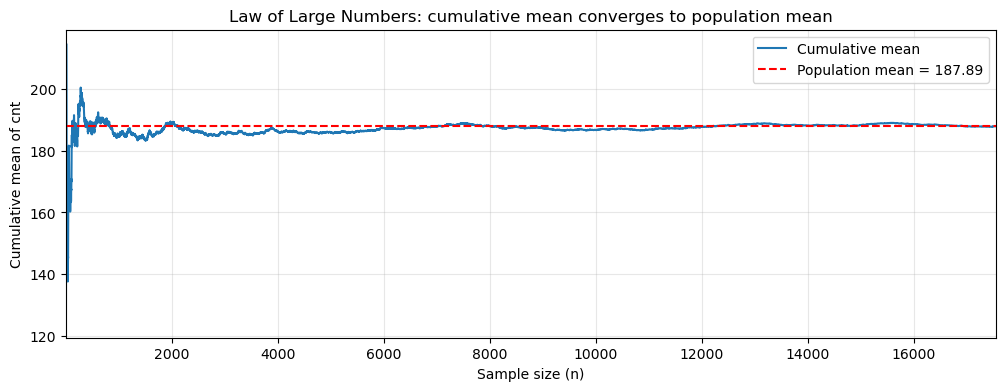

Population (empirical) mean = 187.886, std = 181.273, N = 17544
Interpretation: the cumulative mean stabilises near the population mean as n grows, demonstrating LLN.


In [25]:
# Law of Large Numbers demonstration (cumulative mean converges to population mean)


cnt = df["cnt"].dropna().values
N = len(cnt)
pop_mean = cnt.mean()
pop_std = cnt.std(ddof=0)

# Random permutation
rng = np.random.default_rng(0)
perm = rng.permutation(cnt)

# cumulative mean
cum_sum = np.cumsum(perm)
n = np.arange(1, N+1)
cum_mean = cum_sum / n



# plot
plt.figure(figsize=(12,4))
plt.plot(n, cum_mean, label="Cumulative mean")
plt.hlines(pop_mean, 1, N, color="red", linestyle="--", label=f"Population mean = {pop_mean:.2f}")
plt.xlabel("Sample size (n)")
plt.ylabel("Cumulative mean of cnt")
plt.title("Law of Large Numbers: cumulative mean converges to population mean")
plt.legend()
plt.xlim(1, N)
plt.grid(alpha=0.3)
plt.show()



print(f"Population (empirical) mean = {pop_mean:.3f}, std = {pop_std:.3f}, N = {N}")
print("Interpretation: the cumulative mean stabilises near the population mean as n grows, demonstrating LLN.")


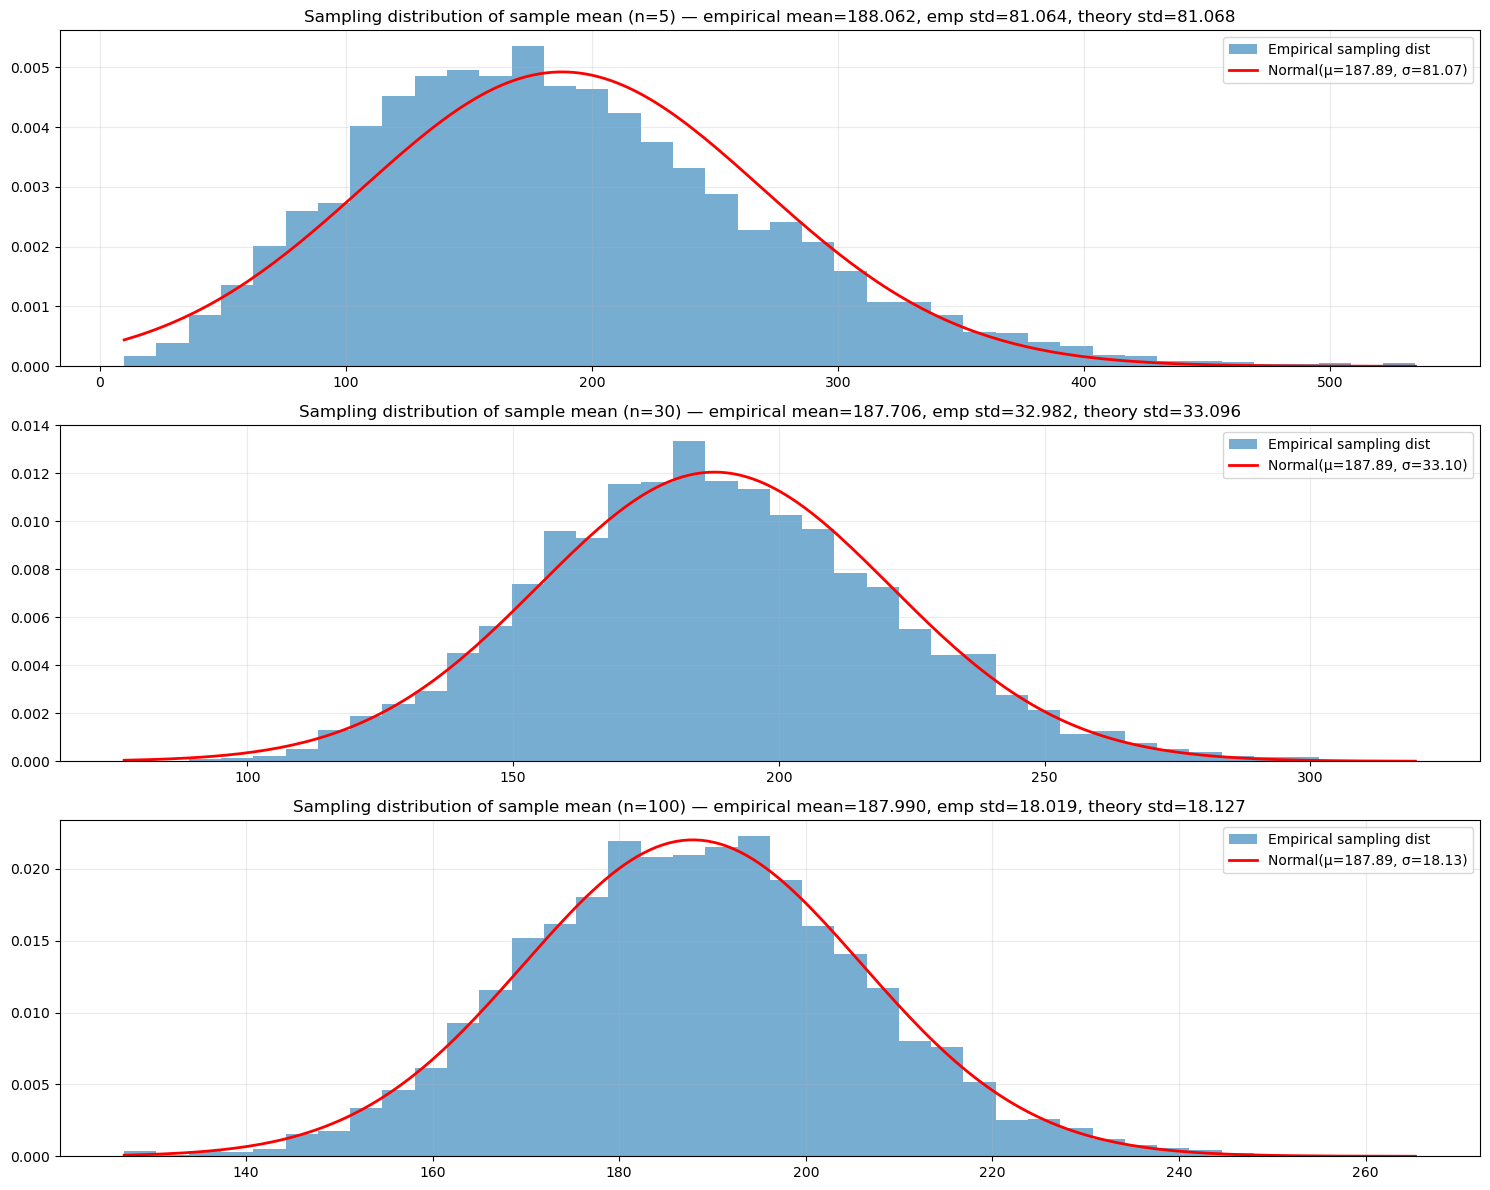

n=5: empirical mean=187.536, empirical std=81.688, theoretical std=81.068
n=30: empirical mean=188.204, empirical std=33.196, theoretical std=33.096
n=100: empirical mean=188.410, empirical std=18.209, theoretical std=18.127

Interpretation: as n increases the sampling distribution of the mean becomes tighter (std ~ σ/√n) and more Gaussian-looking, demonstrating CLT.


In [26]:
# CLT demonstration — sampling distributions of the sample mean for different n
#SD of sample means=SD of raw data / (sqrt(n)

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp


cnt = df["cnt"].dropna().values
pop_mean = cnt.mean()
pop_std = cnt.std(ddof=0)

def normal_pdf(x, mu, sigma):
    # normal pdf
    return (1.0 / (sigma * sqrt(2*pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

rng = np.random.default_rng(1)
reps = 5000  # number of repeated samples per n
sample_sizes = [5, 30, 100]

plt.figure(figsize=(15, 4 * len(sample_sizes)))
for i, n in enumerate(sample_sizes):
    # draw sample means
    means = []
    for _ in range(reps):
        sample = rng.choice(cnt, size=n, replace=True)
        means.append(sample.mean())
    means = np.array(means)
    emp_mean = means.mean()
    emp_std = means.std(ddof=0)
    theo_std = pop_std / np.sqrt(n)
    
    ax = plt.subplot(len(sample_sizes), 1, i+1)
    # histogram
    bins = 40
    ax.hist(means, bins=bins, density=True, alpha=0.6, label="Empirical sampling dist")
    # overlay normal pdf
    xs = np.linspace(means.min(), means.max(), 200)
    ax.plot(xs, [normal_pdf(x, pop_mean, theo_std) for x in xs], color='red', lw=2, label=f"Normal(μ={pop_mean:.2f}, σ={theo_std:.2f})")
    ax.set_title(f"Sampling distribution of sample mean (n={n}) — empirical mean={emp_mean:.3f}, emp std={emp_std:.3f}, theory std={theo_std:.3f}")
    ax.legend()
    ax.grid(alpha=0.25)

plt.tight_layout()
plt.show()

# Print numeric summary
for n in sample_sizes:
    
    means = np.array([rng.choice(cnt, size=n, replace=True).mean() for _ in range(reps)])
    print(f"n={n}: empirical mean={means.mean():.3f}, empirical std={means.std(ddof=0):.3f}, theoretical std={pop_std/np.sqrt(n):.3f}")
    
print("\nInterpretation: as n increases the sampling distribution of the mean becomes tighter (std ~ σ/√n) and more Gaussian-looking, demonstrating CLT.")


In [27]:
# Target & feature engineering 
import numpy as np
import pandas as pd


df = df.copy()


# 1) Target - predict rentals

df["y"] = df["cnt"].shift(-1)


# 2) Previous Hours features

df["cnt_lag_1"] = df["cnt"].shift(1)
df["cnt_lag_24"] = df["cnt"].shift(24)
df["cnt_roll24_mean"] = df["cnt"].shift(1).rolling(24, min_periods=1).mean()


# 3) Time features

hours = df.index.hour
df["hour_sin"] = np.sin(2 * np.pi * hours / 24)
df["hour_cos"] = np.cos(2 * np.pi * hours / 24)
df["is_weekend"] = (df.index.weekday >= 5).astype(int)


# 4) Season & weather 

if "season" in df.columns:
    
    df["season"] = df["season"].fillna(method="ffill")
else:
    df["season"] = 0

for col in ["temp", "atemp", "hum", "windspeed"]:
    if col not in df.columns:
        df[col] = np.nan


# 5) Rush hour (time-based, non-circular)

rush_hours = [7, 8, 9, 16, 17, 18]
df["is_rush_time"] = df.index.hour.isin(rush_hours).astype(int)


feature_cols = [
    "cnt_lag_1", "cnt_lag_24", "cnt_roll24_mean",
    "hour_sin", "hour_cos", "is_weekend",
    "season", "temp", "atemp", "hum", "windspeed",
    "is_rush_time"
]

df_model = df[feature_cols + ["y"]].dropna().copy()

print("Next-hour rental demand is predicted using lagged demand, rolling averages, time-of-day, calendar, season, and weather features to capture temporal dependence, daily cycles")
print("Rows available:", len(df_model))
print("Features:", feature_cols)


Next-hour rental demand is predicted using lagged demand, rolling averages, time-of-day, calendar, season, and weather features to capture temporal dependence, daily cycles
Rows available: 17354
Features: ['cnt_lag_1', 'cnt_lag_24', 'cnt_roll24_mean', 'hour_sin', 'hour_cos', 'is_weekend', 'season', 'temp', 'atemp', 'hum', 'windspeed', 'is_rush_time']


C:\Users\Vikram\AppData\Local\Temp\ipykernel_25296\98690798.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["season"] = df["season"].fillna(method="ffill")


In [28]:
 # train/test split

from sklearn.preprocessing import StandardScaler

X = df_model[feature_cols]
y = df_model["y"]

split_idx = int(len(df_model) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 13883, Test size: 3471


In [29]:
# Model fitting & validation 

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# 
#Ridge Regression (linear + regularization)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


# Evaluation function

def evaluate(y_true, y_pred, name):
    print(f"{name}:")
    print(" RMSE =", np.sqrt(mean_squared_error(y_true, y_pred)))
    print(" MAE  =", mean_absolute_error(y_true, y_pred))
    print(" R²   =", r2_score(y_true, y_pred))
    print()

print("Model performance on test set:\n")
evaluate(y_test, y_pred_lin, "Linear Regression")
evaluate(y_test, y_pred_ridge, "Ridge Regression")
print("Ordinary Linear Regression provides a simple baseline, while Ridge Regression adds penalty to prevent overfitting.\n")

Model performance on test set:

Linear Regression:
 RMSE = 141.39039970341892
 MAE  = 96.23012363602048
 R²   = 0.5893403975933302

Ridge Regression:
 RMSE = 141.39099028339993
 MAE  = 96.22872934430599
 R²   = 0.5893369669806832

Ordinary Linear Regression provides a simple baseline, while Ridge Regression adds penalty to prevent overfitting.



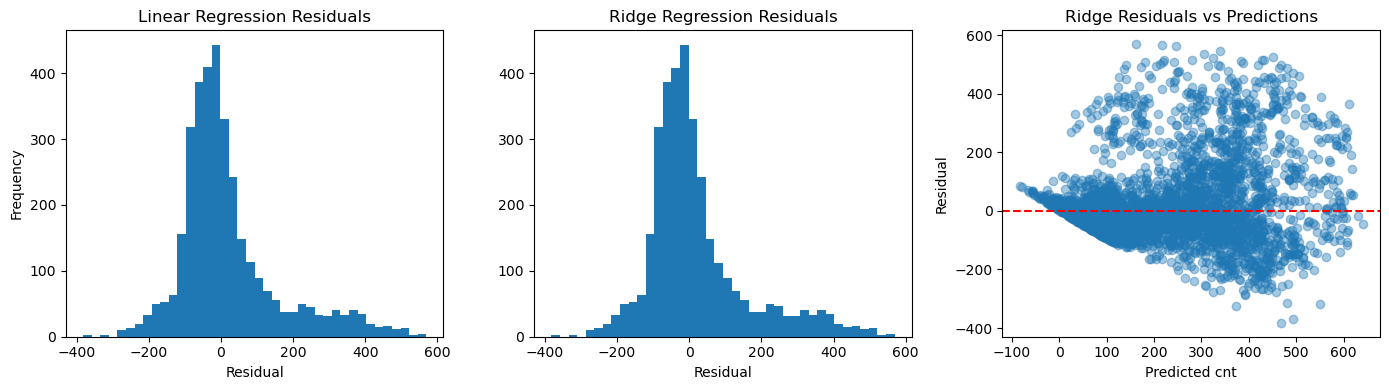

Residual summary statistics:

Linear Regression:
 Mean residual = 19.67534129397147
 Std residual  = 140.0349087810394

Ridge Regression:
 Mean residual = 19.68103956763488
 Std residual  = 140.03470427866208

Non linear models could be used to better capture peak demand hours.



In [30]:
#Residual analysis

import matplotlib.pyplot as plt
import numpy as np

# Compute residuals
resid_lin = y_test - y_pred_lin
resid_ridge = y_test - y_pred_ridge

plt.figure(figsize=(14,4))


#  Residual distribution -Linear Regression

plt.subplot(1,3,1)
plt.hist(resid_lin, bins=40)
plt.title("Linear Regression Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")


# 2. Residual distribution -Ridge Regression

plt.subplot(1,3,2)
plt.hist(resid_ridge, bins=40)
plt.title("Ridge Regression Residuals")
plt.xlabel("Residual")


# 3. Residuals vs predictions (Ridge)

plt.subplot(1,3,3)
plt.scatter(y_pred_ridge, resid_ridge, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted cnt")
plt.ylabel("Residual")
plt.title("Ridge Residuals vs Predictions")

plt.tight_layout()
plt.show()


# Print summary statistics

print("Residual summary statistics:\n")

print("Linear Regression:")
print(" Mean residual =", resid_lin.mean())
print(" Std residual  =", resid_lin.std())
print()

print("Ridge Regression:")
print(" Mean residual =", resid_ridge.mean())
print(" Std residual  =", resid_ridge.std())
print()
print("Non linear models could be used to better capture peak demand hours.\n")


In [31]:
# Prepare features for dimensionality reduction (safe, no leakage)

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1) Ensure `df` exists, otherwise load the hour.csv fallback
try:
    df
except NameError:
    print("`df` not found in session — loading '/mnt/data/hour.csv' as fallback.")
    df = pd.read_csv("/mnt/data/hour.csv")
    df["dteday"] = pd.to_datetime(df["dteday"])
    df["timestamp"] = df["dteday"] + pd.to_timedelta(df["hr"], unit="h")
    df = df.set_index("timestamp").sort_index()

# 2) Safe handling: ensure required raw columns exist
required_raw = ["cnt", "temp", "atemp", "hum", "windspeed", "season", "hr"]
for c in required_raw:
    if c not in df.columns:
        raise RuntimeError(f"Required column '{c}' missing from df.")

# 3) Create features (no leakage: exclude 'casual' and 'registered')
df = df.copy()

# target not included here; we only make features for DR
df["cnt_lag_1"] = df["cnt"].shift(1)
df["cnt_lag_24"] = df["cnt"].shift(24)
df["cnt_roll24_mean"] = df["cnt"].shift(1).rolling(24, min_periods=1).mean()

# cyclical hour encoding
hours = df.index.hour
df["hour_sin"] = np.sin(2 * np.pi * hours / 24)
df["hour_cos"] = np.cos(2 * np.pi * hours / 24)
df["is_weekend"] = (df.index.weekday >= 5).astype(int)

# safe season handling: forward-fill if NaN, keep as-is otherwise
if "season" in df.columns:
    df["season"] = df["season"].fillna(method="ffill")
else:
    df["season"] = 0

# ensure weather columns exist
for col in ["temp", "atemp", "hum", "windspeed"]:
    if col not in df.columns:
        df[col] = np.nan

# non-circular rush hour flag (time-of-day)
rush_hours = [7,8,9,16,17,18]
df["is_rush_time"] = df.index.hour.isin(rush_hours).astype(int)

# 4) Feature list used for dimensionality reduction
feat_cols = [
    "cnt_lag_1", "cnt_lag_24", "cnt_roll24_mean",
    "hour_sin", "hour_cos", "is_weekend",
    "season", "temp", "atemp", "hum", "windspeed",
    "is_rush_time"
]

# 5) Build X_dr (drop rows with NaNs in these features)
X = df[feat_cols].copy().dropna()
if X.shape[0] == 0:
    raise RuntimeError("No rows available after dropping NaNs. Re-check preprocessing.")
print(f"X shape before scaling: {X.shape}")

# 6) Standardize
scaler = StandardScaler()
X_dr = scaler.fit_transform(X)   # numpy array
print(f"X_dr shape (standardized): {X_dr.shape}")

# 7) plot_df for coloring and interpretation (aligned to X index)
plot_df = pd.DataFrame(index=X.index)
plot_df["hour"] = X.index.hour
plot_df["season"] = df.loc[X.index, "season"].astype(int)
plot_df["cnt"] = df.loc[X.index, "cnt"]
overall_median = float(df["cnt"].median())
plot_df["cnt_above_median"] = (plot_df["cnt"] > overall_median)

print("Prepared X_dr and plot_df. Example rows:")
display(plot_df.head())


X shape before scaling: (17355, 12)
X_dr shape (standardized): (17355, 12)
Prepared X_dr and plot_df. Example rows:


C:\Users\Vikram\AppData\Local\Temp\ipykernel_25296\3546553851.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["season"] = df["season"].fillna(method="ffill")


,hour,season,cnt,cnt_above_median
2011-01-02 00:00:00,0,1,17.0,False
2011-01-02 01:00:00,1,1,17.0,False
2011-01-02 02:00:00,2,1,9.0,False
2011-01-02 03:00:00,3,1,6.0,False
2011-01-02 04:00:00,4,1,3.0,False


In [32]:
# PCA: variance explained (first 10 components)

from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=10, random_state=0)
pca.fit(X_dr)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("Explained variance ratio (first 10 PCs):")
print(np.round(explained, 4))
print("\nCumulative explained variance (first 10 PCs):")
print(np.round(cum_explained, 4))
print(f"\nFraction explained by PC1 + PC2 = {(explained[0] + explained[1]):.4f}")


Explained variance ratio (first 10 PCs):
[0.3012 0.173  0.104  0.0842 0.0812 0.0641 0.0605 0.0501 0.042  0.0226]

Cumulative explained variance (first 10 PCs):
[0.3012 0.4743 0.5783 0.6625 0.7437 0.8078 0.8683 0.9184 0.9604 0.983 ]

Fraction explained by PC1 + PC2 = 0.4743


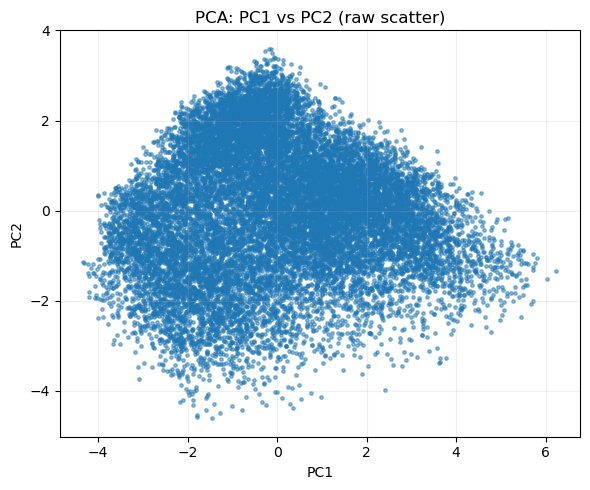

In [33]:
#  PCA projection (PC1 vs PC2), raw scatter

proj2 = pca.transform(X_dr)[:, :2]

plt.figure(figsize=(6,5))
plt.scatter(proj2[:,0], proj2[:,1], s=6, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2 (raw scatter)")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


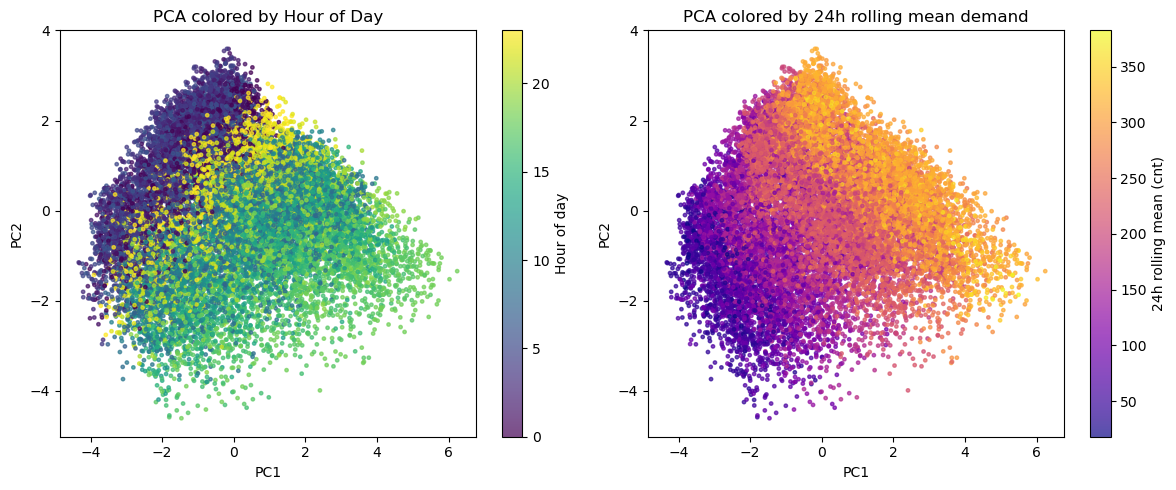

In [34]:
#PCA colored by hour-of-day and 24h rolling mean

# 1) Color by hour of day (continuous)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sc1 = plt.scatter(proj2[:,0], proj2[:,1], c=plot_df["hour"], cmap="viridis", s=6, alpha=0.7)
plt.colorbar(sc1, label="Hour of day")
plt.title("PCA colored by Hour of Day")
plt.xlabel("PC1"); plt.ylabel("PC2")

# 2) Color by rolling 24-hour mean demand (continuous)
rolling_demand = df.loc[plot_df.index, "cnt_roll24_mean"]
plt.subplot(1,2,2)
sc2 = plt.scatter(proj2[:,0], proj2[:,1], c=rolling_demand, cmap="plasma", s=6, alpha=0.7)
plt.colorbar(sc2, label="24h rolling mean (cnt)")
plt.title("PCA colored by 24h rolling mean demand")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()


In [35]:
#  PCA loadings for PC1 and PC2

import pandas as pd

feature_names = feat_cols
loadings = pca.components_[:2].T   # shape (n_features, 2)
loading_df = pd.DataFrame(loadings, index=feature_names, columns=["PC1_loading","PC2_loading"])

# Show top absolute contributors for PC1 and PC2
loading_df["abs_PC1"] = loading_df["PC1_loading"].abs()
loading_df["abs_PC2"] = loading_df["PC2_loading"].abs()

print("Top contributors to PC1 (by absolute loading):")
display(loading_df.sort_values("abs_PC1", ascending=False)[["PC1_loading"]].head(8))

print("\nTop contributors to PC2 (by absolute loading):")
display(loading_df.sort_values("abs_PC2", ascending=False)[["PC2_loading"]].head(8))


Top contributors to PC1 (by absolute loading):


,PC1_loading
temp,0.420152
atemp,0.417783
cnt_lag_1,0.414636
cnt_lag_24,0.413808
cnt_roll24_mean,0.356466
hour_sin,-0.228506
season,0.200906
hour_cos,-0.186369



Top contributors to PC2 (by absolute loading):


,PC2_loading
hum,0.399776
windspeed,-0.364862
season,0.328897
cnt_roll24_mean,0.313535
hour_cos,0.307427
atemp,0.290974
hour_sin,0.284979
is_rush_time,-0.276924


In [36]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create plotting helper columns aligned to X
plot_df = df.loc[X.index, ["season", "cnt"]].copy()
# binary indicator above overall median
overall_median = float(df["cnt"].median())
plot_df["cnt_above_median"] = (plot_df["cnt"] > overall_median)
plot_df["hour"] = X.index.hour

# Expose for following cells
X_dr = X_scaled  # standardized features ready for DR
print("Prepared X_dr with shape:", X_dr.shape)
print("Plotting groups available: seasons =", sorted(plot_df["season"].unique()))

Prepared X_dr with shape: (17355, 12)
Plotting groups available: seasons = [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]


PCA50 shape: (17355, 12)


D:\Anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE done. Shape: (17355, 2)


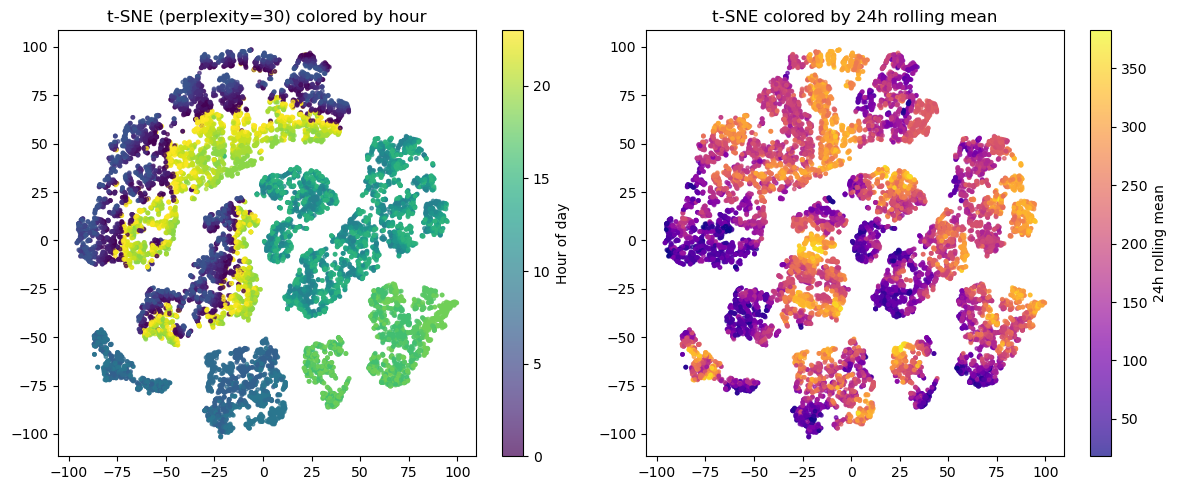

D:\Anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP done. Shape: (17355, 2)


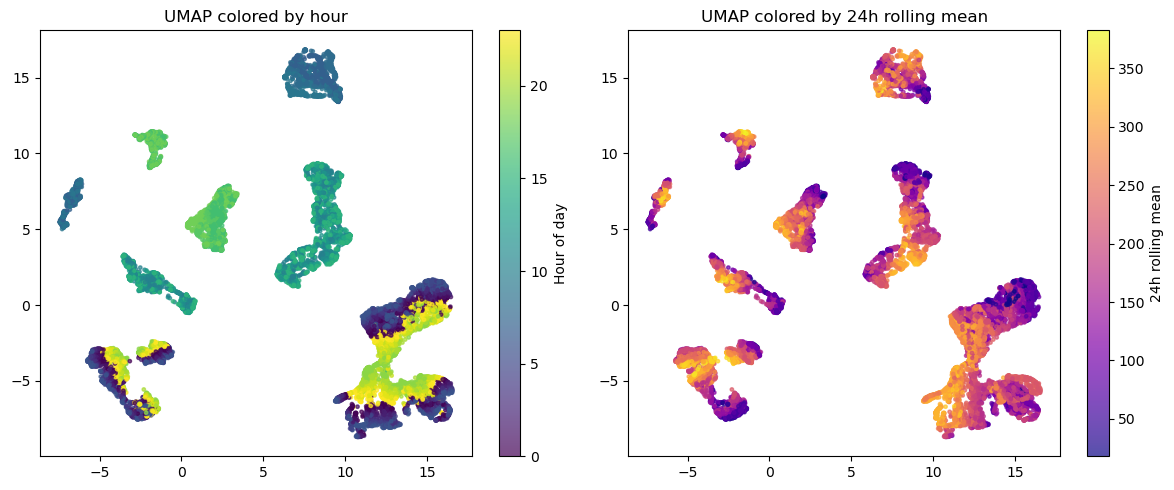

In [38]:
# t-SNE (with PCA pre-reduction) and UMAP 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as PCA_short
import matplotlib.pyplot as plt

# Pre-reduce to 50 dims for speed and stability
pca50 = PCA_short(n_components=min(50, X_dr.shape[1]), random_state=0)
Z50 = pca50.fit_transform(X_dr)
print("PCA50 shape:", Z50.shape)

# t-SNE: justified hyperparameters
# For dataset size ~10k-17k, perplexity 20-40 is standard. We choose 30.
tsne_perplexity = 30
tsne = TSNE(n_components=2, perplexity=tsne_perplexity, n_iter=1000, init="pca", random_state=0)
Z_tsne = tsne.fit_transform(Z50)
print("t-SNE done. Shape:", Z_tsne.shape)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(Z_tsne[:,0], Z_tsne[:,1], c=plot_df["hour"], cmap="viridis", s=6, alpha=0.7)
plt.colorbar(label="Hour of day")
plt.title(f"t-SNE (perplexity={tsne_perplexity}) colored by hour")

plt.subplot(1,2,2)
plt.scatter(Z_tsne[:,0], Z_tsne[:,1], c=rolling_demand, cmap="plasma", s=6, alpha=0.7)
plt.colorbar(label="24h rolling mean")
plt.title("t-SNE colored by 24h rolling mean")
plt.tight_layout()
plt.show()


try:
    import umap.umap_ as umap
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=0)
    Z_umap = reducer.fit_transform(Z50)
    print("UMAP done. Shape:", Z_umap.shape)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.scatter(Z_umap[:,0], Z_umap[:,1], c=plot_df["hour"], cmap="viridis", s=6, alpha=0.7)
    plt.colorbar(label="Hour of day")
    plt.title("UMAP colored by hour")

    plt.subplot(1,2,2)
    plt.scatter(Z_umap[:,0], Z_umap[:,1], c=rolling_demand, cmap="plasma", s=6, alpha=0.7)
    plt.colorbar(label="24h rolling mean")
    plt.title("UMAP colored by 24h rolling mean")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("UMAP not available or failed to run in this environment. Exception:", str(e))
    
